# DDO4MLA Assignment 2

## Introduction

In this assignment, a single artificial neuron is to be implemented. Perform the assignment by writing your code below the ToDo comments and writing mathematical derivations in ToDo sections. Each ToDo comment provides a brief description of what your code should do and the amount of points you will get for the correctly written code.

## Task 1

An artificial neuron can be thought of as the perceptron where the Heaviside step function is replaced with some differentiable equivalent. Such an activation function would allow for using gradient-based learning algorithms and various loss functions. A sigmoid function is an obvious candidate since it is differentiable and its output is in the range 0 to 1. This function along with its derivative are defined as:

$$\sigma(a)=\frac{1}{1+e^{-a}},\tag{1.1}$$

$$\sigma'(a)=\sigma(a)(1-\sigma(a)),\tag{1.2}$$

where $\sigma(a)$ is a sigmoid function, and $\sigma'(a)$ is its derivative, and $a=w\cdot x$ is a scalar representing a weighted sum of the input variables $x$. The cell below defines a sigmoid function with its derivative.

In [ ]:
def sigmoid(a):
  """
  Computes a sigmoid function
  Arguments:
      a: an argument of the function
  Returns:
      A return value of the function
  """
  return 1 / (1 + np.exp(-a))

def sigmoid_deriv(a):
  """
  Computes a derivative of a sigmoid function
  Arguments:
      a: an argument of the function
  Returns:
      A return value of the function derivative
  """
  return sigmoid(a) * (1 - sigmoid(a))

Knowing the structure of a perceptron and having a new activation function, it is possible to create a class for a single artificial neuron. The class **NonTrainableNeuron** below represents an artificial neuron without any training algorithm. It has the methods **forward_pass(X)** and **forward_pass_deriv(X)** computing the activation function (making predictions) and its derivative for each sample in the matrix $X$ respectively. However, instead of explicitly using the above-defined sigmoid function, this class can use any activation function chosen upon its instantiation. The class stores weights, activation function, and its derivative in the attributes **w**, **AF**, and **AF_deriv**, respectively.

**Task**: write your code below the **ToDo** comments in the method **forward_pass(X)** and the method **forward_pass_deriv(X)**.

In [ ]:
class NonTrainableNeuron:
  """
  Class representing a single artificial neuron without a training algorithm
  """

  def __init__(self, weights, activation_function=sigmoid,
               activation_function_derivative=sigmoid_deriv):
    """
    Initializes an instance of the class
    Arguments:
        w: a column-vector containing a bias and weights
        activation_function: an activation function
        activation_function_derivative: an activation function derivative
    """
    self.w = weights
    self.AF = activation_function
    self.AF_deriv = activation_function_derivative
    
  def forward_pass(self, X):
    """
    Computes the activation function for each sample
    Arguments:
        X: a matrix with each row containing a sample
    Returns:
        A column-vector of the activation function values
    """
    # ToDo: Compute the activation function for each sample in X (0.5 points)
    return self.AF(X.dot(self.w))

  def forward_pass_deriv(self, X):
    """
    Computes the activation function derivative for each sample
    Arguments:
        X: a matrix with each row containing a sample
    Returns:
        A column-vector of the activation function derivative values
    """
    # ToDo: Compute the activation function derivative for each sample in X (0.5 points)
    return self.AF_deriv(X.dot(self.w))

Run the cell below to generate a dataset of two linearly separable sets.

In [ ]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
import autograd as ad
import autograd.numpy as np
import autograd.numpy.linalg as la

def gen_lin_sep_data(l, m, n, cy=12):
  """
  Generates a dataset of linearly separable labeled data for classification
  Arguments:
      l: a number of classes (label)
      m: a number of features (inputs)
      n: a number of observations (samples)
      cy: a y-coordinate of the center box
  Returns:
      A tuple containing the matrix X and the vector y
  """
  return datasets.make_blobs(
      centers=l, n_samples=n, n_features=m, center_box=(0, cy), random_state=1)

def plot_data(X, y, lower=None, upper=None, **kwargs):
  """
  Makes pairplots for all features in a dataset
  Arguments:
      X: a matrix of features (inputs)
      y: a vector of observations (labels)
      lower: a function applied to the lower diagonal subplot
      upper: a function applied to the upper diagonal subplot
  """
  # Generate a Pandas DataFrame
  df = pd.DataFrame(dict(
      [('x' + str(i + 1), X[:, i]) for i in range(0, X.shape[1])] +
      [('y', y)]))
  
  # Make pairplots for all features in a DataFrame
  sns.set(style='ticks')
  graph = sns.pairplot(df, hue='y')

  # Plot on the lower diagonal subplot
  if lower is not None:
    graph.map_lower(lower, w=kwargs['w'])

  # Plot on the upper diagonal subplot
  if upper is not None:
    graph.map_upper(upper, w=kwargs['w'])

  # Plot the graph
  plt.show()

def add_ones(X):
  """
  Prepends a matrix X with a column of ones
  Arguments:
      X: a matrix of samples
  Returns:
      The matrix X prepended with a column of ones
  """
  return np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

# Generate the dataset
X, y = gen_lin_sep_data(2, 2, 1000)

# Split the dataset into the training and the test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False)

# Normalize the training and the test sets separately
X_train = minmax_scale(X_train)
X_test = minmax_scale(X_test)

# Add a columns of ones to the training and the test sets
X_train = add_ones(X_train)
X_test = add_ones(X_test)

Run the cell below to test the above-defined class on first 6 samples of the training set. The output should be:

```
[0.905 0.84  0.938 0.839 0.799 0.787]
[0.086 0.135 0.058 0.135 0.161 0.167]
```

In [ ]:
# Create a column-vector of weights
weights = np.ones(3)

# Create an instance of the NonTrainableNeuron class
neuron = NonTrainableNeuron(weights)

# Test the class on first 6 samples of the training set
print(np.around(neuron.forward_pass(X_train[0:6]), 3))
print(np.around(neuron.forward_pass_deriv(X_train[0:6]), 3))

[0.905 0.84  0.938 0.839 0.799 0.787]
[0.086 0.135 0.058 0.135 0.161 0.167]


## Task 2

The training of an artificial neuron can be formulated as an optimization problem. It requires choosing the activation and the loss functions. Their choice depends on the particular application, e.g., whether it is a regression or a classification task. Once the optimization problem is formulated, the formulas of gradients w.r.t. to the weights can be derived. When the gradients formulas are derived, it is possible to use various gradient-based optimization algorithms to solve the formulated optimization problem, therefore, training the artificial neuron.

One of the loss functions used in regression is the mean squared error (MSE). Using this loss function gives rise to the following optimization problem:

$$\min_wJ(w)=\frac{1}{2n}\sum_{i=1}^n(\hat y^{(i)}-y^{(i)})^2,\tag{2.1}$$

where $J(w)$ is the MSE loss function, $n$ is a number of samples in a dataset, $\hat{y}^{(i)}$ is the neuron output for the i-th sample, and $y^{(i)}$ is the correct answer for the i-th sample from the dataset.

The difference between prediction $y^{(i)}$ and the correct answer $ y^{(i)}$ is squared to penalize (increase the value of the loss function) large prediction errors harder than the smaller ones. The square also ensures that all errors have the same sign and are summed up instead of being subtracted from each other. The smaller the value of the loss function, the fewer errors the model makes when classifying. Thus we want to minimize this function, finding optimal weights, that minimize the function value.



Although it is possible to use the MSE loss function in a classification task, it might not be the best choice: if a sigmoid function serves as an activation function, the resulting optimization problem will be non-convex. However, the binary cross-entropy (also known as the logistic loss) will yield a convex optimization problem in such a scenario. The optimization problem with the logistic loss is defined as follows:

$$\min_wJ(w)=\frac{1}{n}\sum_{i=1}^n(-y^{(i)}log(\hat y^{(i)})-(1-y^{(i)})log(1-\hat y^{(i)})),\tag{2.2}$$

where $J(w)$ is the logistic loss function, and $log$ is a natural logarithm.

Each observation $y^{(i)}$ and prediction $\hat{y}^{(i)}$ can be regarded as two discrete distributions $p^{(i)}\in{\{y^{(i)},1-y^{(i)}\}}$ and $q^{(i)}\in{\{\hat{y}^{(i)},1-\hat{y}^{(i)}\}}$. Therefore, the resulting neuron can be interpreted as an approximate distribution $q^{(i)}$ estimating the real distribution $p^{(i)}$, and the binary-cross entropy measures dissimilarity between these two distributions. The optimization problem above considers all $n$ observations and therefore minimizes average dissimilarity between the distributions.

**Task**: write your code below the **ToDo** comments in the functions **mse_loss(neuron, X, y)** and **log_loss(neuron, X, y)** to compute the MSE loss and the logistic loss of a given neuron.

In [ ]:
def log_loss(neuron, X, y):
  """
  Computes the logistic loss of a given neuron
  Arguments:
      neuron: a neuron
      X: a matrix of samples
      y: a vector of outputs
  Returns:
      The logistic loss of a given neuron
  """
  # ToDo: Compute the logistic loss of a given neuron (0.5 points)
  Y_predict = neuron.forward_pass(X)
  log_loss = (-y*np.log(Y_predict)-(1-y)*np.log(1-Y_predict)).mean()
  return (-y*np.log(Y_predict)-(1-y)*np.log(1-Y_predict)).mean()


def mse_loss(neuron, X, y):
  """
  Computes the MSE loss of a given neuron
  Arguments:
      neuron: a neuron
      X: a matrix of samples
      y: a vector of outputs
  Returns:
      The MSE loss of a given neuron
  """
  # ToDo: Compute the MSE loss of a given neuron (0.5 points)
  Y_predict = neuron.forward_pass(X)
  return np.square(np.subtract(Y_predict,y)).mean()/2


Run the cell below to test the above-defined function on a neuron with unit weights and the previously created training set. The output should be:

```
0.215
1.323
```

In [ ]:
# Create a column-vector of weights
weights = np.ones(3)

# Create an instance of the NonTrainableNeuron class
neuron = NonTrainableNeuron(weights)

# Test the mse_loss function
print(np.around(mse_loss(neuron, X_train, y_train), 3))
print(np.around(log_loss(neuron, X_train, y_train), 3))

0.215
1.323


In [ ]:
1-np.ones(3)

array([0., 0., 0.])

## Task 3

The previously formulated optimization problem can be solved iteratively using one of the gradient-based algorithms covered earlier. To use such an algorithm one needs to obtain the gradient of the loss function w.r.t. the neuron weights.

First, let us consider the MSE loss and a linear activation function $\hat{y}^{(i)}=w^Tx^{(i)}$. The partial derivative of $J(w)$ w.r.t. an arbitrary weight $w_j$, where $j=1,\dots,m$, and $m$ is the number of features is:

$$\frac{\partial J}{\partial w_j}=\frac{\partial}{\partial w_j}\bigg(\frac{1}{2n}\sum_{i=1}^n(\hat y^{(i)}-y^{(i)})^2\bigg)=\frac{1}{2n}\sum_{i=1}^n\frac{\partial}{\partial w_j}\bigg((\hat y^{(i)}-y^{(i)})^2\bigg).\tag{3.1}$$

Since $J(w)$ is a composition of the loss and the activation functions, i.e., $J(w)$ does not directly depend on $w_j$, the chain rule must be employed:

$$\frac{\partial J}{\partial w_j}=\frac{1}{2n}\sum_{i=1}^n\frac{\partial}{\partial\hat y^{(i)}}\bigg((\hat y^{(i)}-y^{(i)})^2\bigg)\frac{\partial \hat y^{(i)}}{\partial w_j}.\tag{3.2}$$

The first partial derivative in the expression above is equal to:

$$\frac{\partial}{\partial\hat y^{(i)}}\bigg((\hat y^{(i)}-y^{(i)})^2\bigg)=2(\hat y^{(i)}-y^{(i)}).\tag{3.3}$$

The second partial derivative is equal to:

$$\frac{\partial\hat{y}^{(i)}}{\partial w_j}=\frac{\partial}{\partial w_j}\bigg(w^Tx^{(i)}\bigg)=\frac{\partial}{\partial w_j}\bigg(\sum_{k=1}^mw_kx_k^{(i)}\bigg)=x_j^{(i)}.\tag{3.4}$$

Substituting the obtained partial derivatives $(3.3)$ and $(3.4)$ back into $(3.2)$ yields:

$$\frac{\partial J}{\partial w_j}=\frac{1}{2n}\sum_{i=1}^n2(\hat y^{(i)}-y^{(i)})x_j^{(i)}=\frac{1}{n}(\hat{y}-y)^Tx_j,\tag{3.5}$$

where $\hat{y}=\begin{bmatrix}\hat{y}^{(1)} & \hat{y}^{(2)} & \cdots & \hat{y}^{(n)}\end{bmatrix}^T$ is a column-vector of predictions, $y=\begin{bmatrix}y^{(1)} & y^{(2)} & \cdots & y^{(n)}\end{bmatrix}^T$ is a column-vector of observations, and $x_j$ is the j-th column of the matrix with samples $X$.

Using $(3.5)$ the gradient of the loss function w.r.t. the neuron weights is obtained as:

$$\nabla_wJ(w)=\begin{bmatrix}\frac{\partial J}{\partial w_1}\\\vdots\\\frac{\partial J}{\partial w_j}\\\vdots\\\frac{\partial J}{\partial w_m}\end{bmatrix}=\frac{1}{n}\begin{bmatrix}(\hat{y}-y)^Tx_1\\\vdots\\(\hat{y}-y)^Tx_j\\\vdots\\(\hat{y}-y)^Tx_m\end{bmatrix}=\frac{1}{n}X^T(\hat{y}-y).\tag{3.6}$$

Using any other activation function (e.g., a sigmoid function) will add one more partial derivative term into $(3.2)$, but the overall derivation strategy stays the same.

**Task:** derive the gradient w.r.t. the neuron weights $\nabla_wJ(w)$ of the MSE loss function with the activation function being $\hat{y}^{(i)}=\sigma(w^Tx^{(i)})$, i.e., a sigmoid function, in the cell below. Use LaTeX to write down your derivations, and stick to the above notations. Use $\odot$ (\odot) to denote the element-wise multiplication, and $\hat{y}'$ to denote a vector of the activation function derivatives evaluated on the samples from the dataset, i.e., $\hat{y}'=\begin{bmatrix}\sigma'(w^Tx^{(1)}) & \sigma'(w^Tx^{(2)}) & \cdots & \sigma'(w^Tx^{(n)})\end{bmatrix}^T$

**ToDo (2.5 points)**

Finally, you should arrive at the following expression:

$$\nabla_wJ(w)=\frac{1}{n}X^T((\hat{y}-y)\odot\hat{y}').\tag{3.7}$$

⊙ ŷ

Consider the following MSE equation i.e. 
$$\frac{\partial J}{\partial w_j}=\frac{\partial}{\partial w_j}\bigg(\frac{1}{2n}\sum_{i=1}^n(\hat y^{(i)}-y^{(i)})^2\bigg)=\frac{1}{2n}\sum_{i=1}^n\frac{\partial}{\partial w_j}\bigg((\hat y^{(i)}-y^{(i)})^2\bigg)\tag{3.8}$$

$J(w)$ is independent of $w_j$. Hence, we can apply the chain rule of differentiation on the equation (3.8)
$$\frac{\partial J}{\partial w_j}=\frac{1}{2n}\sum_{i=1}^n\frac{\partial}{\partial\hat y^{(i)}}\bigg((\hat y^{(i)}-y^{(i)})^2\bigg)\frac{\partial \hat y^{(i)}}{\partial w_j}\tag{3.9}$$

First partial derivative of equation (3.9) : 
$$\frac{\partial}{\partial\hat y^{(i)}}\bigg((\hat y^{(i)}-y^{(i)})^2\bigg)=2(\hat y^{(i)}-y^{(i)})\tag{3.10}$$[link text](https://)

Second partial derivative using sigmoid: 
$$\frac{\partial\hat{y}^{(i)}}{\partial w_j}=\frac{\partial}{\partial w_j}\bigg(σ(w^Tx^{(i)})\bigg)=\sigma(w^Tx^{(i)})(1-\sigma(w^Tx^{(i)}))=\hat {y}'.\tag{3.11}$$

Substituting the obtained partial derivatives $(3.10)$ and $(3.11)$ back into $(3.9)$:

$$\frac{\partial J}{\partial w_j}=\frac{1}{2n}\sum_{i=1}^n2(\hat y^{(i)}-y^{(i)}) \sigma(w^Tx^{(i)})(1-\sigma(w^Tx^{(i)}))=\frac{1}{n}(\hat{y}-y)^T\hat {y}',\tag{3.12}$$


where $\hat{y}=\begin{bmatrix}\hat{y}^{(1)} & \hat{y}^{(2)} & \cdots & \hat{y}^{(n)}\end{bmatrix}^T$ is a column-vector of predictions, $y=\begin{bmatrix}y^{(1)} & y^{(2)} & \cdots & y^{(n)}\end{bmatrix}^T$ is a column-vector of observations, $x_j$ is the j-th column of the matrix with samples $X$, and
$\hat{y}'=\begin{bmatrix}\sigma'(w^Tx^{(1)}) & \sigma'(w^Tx^{(2)}) & \cdots & \sigma'(w^Tx^{(n)})\end{bmatrix}^T$ .
<br><br><br>
Using the above equation $(3.12)$, gradient of the MSE loss function w.r.t. the neuron weights is obtained as:
<br><br>
$$\nabla_wJ(w)=\begin{bmatrix}\frac{\partial J}{\partial w_1}\\\vdots\\\frac{\partial J}{\partial w_j}\\\vdots\\\frac{\partial J}{\partial w_m}\end{bmatrix}=\frac{1}{n}\begin{bmatrix}(\hat{y}-y)^T\\\vdots\\(\hat{y}-y)^T\\\vdots\\(\hat{y}-y)^T\end{bmatrix}\begin{bmatrix}(\sigma'(w^Tx^{(1)})\\\vdots\\(\sigma'(w^Tx^{(j)})\\\vdots\\(\sigma'(w^Tx^{(m)})\end{bmatrix}=\frac{1}{n}X^T(\hat{y}-y)\odot\hat{y}'.\tag{3.13}$$

Finally we get:
<br><br>
$$\nabla_wJ(w)=\frac{1}{n}X^T((\hat{y}-y)\odot\hat{y}')\tag{3.14}$$

Which is equivalent to equation $(3.7)$

## Task 4

**Task:** derive the gradient w.r.t. the neuron weights $\nabla_wJ(w)$ of the logistic loss function from the equation $(2.2)$ with the activation function being $\hat{y}^{(i)}=\sigma(w^Tx^{(i)})$, i.e., a sigmoid function, in the cell below. Use LaTeX to write down your derivations, and stick to the above notations.

**ToDo (2.5 points)**

Finally, you should arrive at the following expression:

$$\nabla_wJ(w)=\frac{1}{n}X^T(\hat{y}-y)\tag{4.1}$$

The equation of logistic loss function is: $$\min_wJ(w)=\frac{1}{n}\sum_{i=1}^n(-y^{(i)}log(\hat y^{(i)})-(1-y^{(i)})log(1-\hat y^{(i)}))\tag{4.2}$$

$J(w)$ does not directly depend on $w_j$, Therefore apply the chain rule on the above equation $(4.2)$ :
$$\frac{\partial J}{\partial w_j}=\frac{1}{n}\sum_{i=1}^n\bigg(-y^{(i)}log(\hat y^{(i)})-(1-y^{(i)})log(1-\hat y^{(i)}))\bigg)\frac{\partial \hat y^{(i)}}{\partial w_j}\tag{4.3}$$

First partial derivatiive:
$$\frac{\partial}{\partial\hat y^{(i)}}( -y^{(i)}\log(\hat y^{(i)})) - \frac{\partial}{\partial\hat y^{(i)}}( (1-y^{(i)})\log(1-\hat y^{(i)}))\tag{4.4}$$
<br><br>
$$=\frac{-y^{(i)}}{\hat y^{(i)}} - \frac{1 -y^{(i)}}{1- \hat y^{(i)}}$$ 
<br><br>
$$=\frac{y^{(i)} - \hat y^{(i)}} {\hat y^{(i)}(1- \hat y^{(i)})} \tag{4.5}$$ 

Second partial derivative:
$$\frac{\partial\hat{y}^{(i)}}{\partial w_j}=\frac{\partial}{\partial w_j}\bigg(σ(w^Tx^{(i)})\bigg)=\sigma(w^Tx^{(i)})(1-\sigma(w^Tx^{(i)})).\tag{4.6}$$
$$ \sigma(w^Tx^{(i)}) = \hat y_{i}$$


Since,
$$ \sigma(w^Tx^{(i)}) = \hat y_{i}$$

We can write:
$$\frac{\partial\hat{y}^{(i)}}{\partial w_j}= \hat y^{(i)}(1- \hat y^{(i)}) \tag{4.7}$$

Putting partial derivatives $(4.7)$ and $(4.5)$ into $(4.3)$ Gives:
$$\frac{\partial J}{\partial w_j}=\frac{1}{n}\sum_{i=1}^n \bigg(\frac{y^{(i)} - \hat y^{(i)}} {\hat y^{(i)}(1- \hat y^{(i)})}\bigg) \bigg(\hat y^{(i)}(1- \hat y^{(i)})\bigg) \tag{4.8}$$

Which resolves to:
$$\frac{\partial J}{\partial w_j} = \frac{1}{n} (\hat y^{(i)} - y^{(i)} )^T x_j \tag{4.9}$$

where $\hat{y}=\begin{bmatrix}\hat{y}^{(1)} & \hat{y}^{(2)} & \cdots & \hat{y}^{(n)}\end{bmatrix}^T$ is a column-vector of predictions, $y=\begin{bmatrix}y^{(1)} & y^{(2)} & \cdots & y^{(n)}\end{bmatrix}^T$ is a column-vector of observations, and $x_j$ is the j-th column of the matrix with samples $X$.

Using $(4.9)$ the gradient of the log loss function w.r.t. the neuron weights is obtained as:

<br><br>

$$\nabla_wJ(w)=\begin{bmatrix}\frac{\partial J}{\partial w_1}\\\vdots\\\frac{\partial J}{\partial w_j}\\\vdots\\\frac{\partial J}{\partial w_m}\end{bmatrix}=\frac{1}{n}\begin{bmatrix}(\hat{y}-y)^Tx_1\\\vdots\\(\hat{y}-y)^Tx_j\\\vdots\\(\hat{y}-y)^Tx_m\end{bmatrix}=\frac{1}{n}X^T(\hat{y}-y)\tag{4.10}$$

Finally we get the following expression:
$$\nabla_wJ(w)=\frac{1}{n}X^T(\hat{y}-y).\tag{4.11}$$

<br>
Which is equivalent to equation $(4.1)$

## Task 5

Based on the obtained analytical expressions $(3.7)$ and $(4.1)$ of the gradients, let us create two functions **analit_grad_mse(neuron, X, y)** and **analit_grad_log(neuron, X, y)** computing the gradients of the MSE loss and logistic loss functions (assuming a sigmoid activation function) w.r.t. the neuron weights, respectively. 

**Task**: write your code below the **ToDo** comments in the functions **analit_grad_mse(neuron, X, y)** and **analit_grad_log(neuron, X, y)** to compute the gradients of the MSE loss and the logistic loss for a given neuron.

In [ ]:
def analit_grad_mse(neuron, X, y):
  """
  Computes the gradient of the MSE loss w.r.t. the weights of a given neuron
  Arguments:
      neuron: a neuron
      X: a matrix of samples
      y: a vector of outputs
  Returns:
      The gradient of the MSE loss w.r.t. the neuron weights
  """
  # ToDo: Compute the gradient of the MSE loss w.r.t. the neuron weights (0.5 points)
  Y_predict = neuron.forward_pass(X)
  Y_dash = neuron.forward_pass_deriv(X)
#   grad = (np.subtract(Y_predict,y)*Y_dash)
  grad = np.dot(Y_dash, np.subtract(Y_predict,y))
  grad = np.dot(X.T,grad)
  return grad/X.shape[0]
    
def analit_grad_log(neuron, X, y):
  """
  Computes the gradient of the logistic loss w.r.t. the weights of a given neuron
  Arguments:
      neuron: a neuron
      X: a matrix of samples
      y: a vector of outputs
  Returns:
      The gradient of the logistic loss w.r.t. the neuron weights
  """
  # ToDo: Compute the gradient of the logistic loss w.r.t. the neuron weights (0.5 points)
  Y_predict = neuron.forward_pass(X)
  Y_dash = neuron.forward_pass_deriv(X)
  grad = np.subtract(Y_predict,y)
  grad = np.dot(X.T, grad) / X.shape[0]
  return grad

Run the cell below to test the above-defined functions on a neuron with unit weights and the previously created training set. The output should be:

```
[0.022 0.021 0.02 ]
[0.362 0.298 0.282]
```

In [ ]:
# Create a column-vector of weights
weights = np.ones(3)

# Create an instance of the NonTrainableNeuron class
neuron = NonTrainableNeuron(weights)

# Test the mse_loss function
print(np.around(analit_grad_mse(neuron, X_train, y_train), 3))
print(np.around(analit_grad_log(neuron, X_train, y_train), 3))

[[0.022 0.022 0.022 ... 0.022 0.022 0.022]
 [0.012 0.008 0.021 ... 0.017 0.003 0.019]
 [0.015 0.006 0.016 ... 0.019 0.007 0.011]]
[0.362 0.298 0.282]


## Task 6

The basic gradient descent method is not the best choice for data-driven optimization in the presence of a large amount of data, and possibly a highly non-convex loss function surface. In order to increase the efficiency of the algorithm, one can calculate the gradient not on the entire dataset (i.e., batch gradient descent), but only on a small part, randomly taken from the data (i.e., mini-batch gradient descent). Doing so, faster convergence is achieved, the memory usage is decreased, and, what is most important, local minima of the loss function surface for the entire dataset can be overstepped, because they may not even exist on the surface of loss function for a small portion of the dataset. This algorithm is known as mini-batch gradient descent, which is a generalization of the stochastic gradient descent. Great thanks for the image to Prof. Dr. Patrick Mäder, Dr. Marco Seeland, and their Deep Learning course at TU Ilmenau.

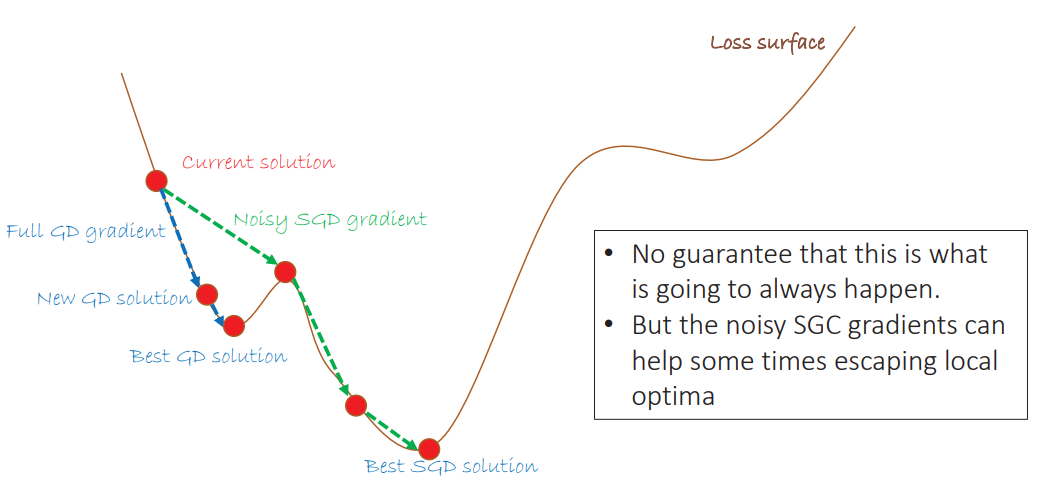

The algorithm behind the mini-batch gradient descent can be represented as follows:

1.   Initialize the iteration counter $i\leftarrow 1$, and compute the number of iterations in an epoch $\text{epoch_size}$;
2.   If $i - 1$ is divisible by $\text{epoch_size}$ (meaning a start of a new epoch), then shuffle samples of the dataset and divide it into consecutive non-overlapping portions (mini-batches) of the same size (batch size), except for the last mini-batch, since its size will usually be less;
3.   Take a mini-batch with index $(i - 1)\space\text{mod}\space\text{epoch_size}$, and use a gradient-based algorithm to update the model parameters;
4.   Stop the algorithm if the stopping criterion is satisfied. Otherwise, update the iteration counter $i\leftarrow i+1$, and repeat the process starting from (2).

Selecting the stopping criterion in step 4 depends on the particular model, the usage of regularization techniques (e.g., early stopping), and many more. In this instance, we can use the maximum number of iterations and the minimum absolute value of the difference between current and previous loss function values:

$$\lvert J(w^{(i)})-J(w^{(i-1)})\rvert<\epsilon,$$

where $w^{(i)}$ is current weights, $w^{(i-1)}$ is previous weights, and $\epsilon$ is a tolerance value.

The class below represents a trainable aritificial neuron. Its method **train_until_convergence(self, X, y, loss, grad, optimizer, batch_size, epsilon, iter_lim)** implements the algorithm above. The method runs a loop, and uses an external gradient-based optimizer passed to it as an argument **optimizer** to update the neuron weights in each iteration. The argument **loss** is a function computing the loss function value (used to check the stopping criterion), and the argument **grad** is a function computing the loss function gradient (used to compute the gradient supplied to **optimizer**).

**Task**: write your code below the **ToDo** comments in the method **train_until_convergence(self, X, y, loss, grad, optimizer, batch_size, epsilon, iter_lim)** to complete the implementation of the mini-batch gradient descent.

In [ ]:
from math import ceil
from sklearn.utils import shuffle
from sklearn.utils import gen_batches

class Neuron(NonTrainableNeuron):
  """
  Class representing a single artificial neuron
  """

  def __init__(self, weights, activation_function=sigmoid,
               activation_function_derivative=sigmoid_deriv):
    """
    Initializes an instance of the class
    Arguments:
        w: a column-vector containing a bias and weights
        activation_function: an activation function
        activation_function_derivative: an activation function derivative
    """
    NonTrainableNeuron.__init__(self, weights, activation_function,
                                activation_function_derivative)
  
  def train_until_convergence(self, X, y, loss, grad, optimizer, batch_size, epsilon=1e-8, iter_lim=1e4):
    """
    Computes the gradient of the logistic loss w.r.t. the weights of a given neuron
    Arguments:
        neuron: a neuron
        X: a matrix of samples
        y: a vector of outputs
        loss: a function to compute the loss function
        grad: a function to compute the loss function gradient
        optimizer: an instance of the class Optimizer
        batch_size: a size of a mini-batch
        epsilon: a tolerance value
        iter_lim: an iterations limit
    """
    # Initialize the iteration counter
    i = 0

    # Initialize the loss function values
    J_prev = loss(self, X, y)
    J_curr = J_prev + 2 * epsilon

    # Compute the number of iterations per epoch
    epoch_size = ceil(X.shape[0] / batch_size)

    # Run iterations
    while abs(J_curr - J_prev) > epsilon and i < iter_lim:
      # Start of a new epoch (step 2)
      if i % epoch_size == 0:
        # Print the loss function value of the previous epoch
        if i != 0:
          print(f'loss = {np.around(J_curr, 3)}')

        # Print the message of the current epoch
        print(f'Epoch {i // epoch_size + 1}... ', end='')

        # Shuffle the dataset
        X, y = shuffle(X, y, random_state=42)

        # Generate mini-batches
        mini_batches = list(gen_batches(X.shape[0], batch_size))

      # Extract a mini-batch (step 3)
      mini_batch = mini_batches[i % epoch_size]
      X_mini_batch = X[mini_batch]
      y_mini_batch = y[mini_batch]

      # ToDo: Update the neuron weights (0.5 points)
    #   self.w =  self.w - (grad(self, X_mini_batch, y_mini_batch))
    #   self.w += (grad(self, X_mini_batch, y_mini_batch))
      Y_predict = self.forward_pass(X_mini_batch)
      dot_product = np.dot(y_mini_batch-Y_predict, X_mini_batch)
      self.w += dot_product


      # Update the loss function values
      J_prev = J_curr
      J_curr = loss(self, X[mini_batch], y[mini_batch])

      # Update the iteration counter
      i += 1
    
    # Print the loss function value of the last epoch
    print(f'loss = {np.around(J_curr, 3)}')

    # Print the message
    if i == iter_lim:
      print("Iterations reached limit")
    else:
      print("Number of iterations:", i)

Run the cell below to define the gradient descent optimizer. Its code is identical to the one from **Practice 7**.

In [ ]:
#@title Define the **Optimizer** and the **GDoptimizer** classes

class Optimizer:
  """
  Optimizer
  """

  def __init__(self, alpha, max_iter, eps, record):
    """
    Creates an instance of the optimizer
    Arguments:
        alpha: a step size
        max_iter: a maximum number of iterations
        eps: a tolerance value
        record: a flag for recording optimization history
    Returns:
        Optimizer
    """
    self.alpha = alpha
    self.max_iter = max_iter
    self.eps = eps
    self.record = record
    self.iter = None
    self.last_deltas = {}
    self.history = {}

  def _deltas(self, grads, key):
    """
    Computes the deltas based on the gradients
    Arguments:
        values: a list containing the current values of the parameter
        grads: a list containing the current gradients of the parameter
        key: a key identifying the type of the parameter
    Returns:
        The list containing the updated values of the parameter
    """
    pass

  def update(self, values, grads, key='default'):
    """
    Updates the parameters
    Arguments:
        values: a list containing the current values of the parameter
        grads: a list containing the current gradients of the parameter
        key: a key identifying the type of the parameter
    Returns:
        The list containing the updated values of the parameter
    """
    # Wrap the values and deltas if necessary
    if type(values) is not list:
      values = [values]
    if type(grads) is not list:
      grads = [grads]

    # Compute the deltas
    deltas = self._deltas(grads, key)

    # Compute the updated values
    # ToDo:
    # Hint: use list comprehension and zip
    updated_values = [value + delta for value, delta in zip(values, deltas)]

    # Store the updated values if necessary
    if self.record:
      if key not in self.history:
        self.history[key] = [values]
      self.history[key].append(updated_values)

    # Unwrap the updated values if necessary
    if len(updated_values) < 2:
      updated_values = updated_values[0]

    # Return the updated values
    return updated_values

  def run(self, key='default'):
    """
    Updates the iteration counter and checks the termination criteria
    Returns:
        False if the optimization should be terminated, and True otherwise
    """
    # Initialize the iteration counter
    if self.iter is None:
      self.iter = 0
      return True

    # Increment the iteration counter
    self.iter = self.iter + 1

    # Check the iteration counter
    if self.iter > self.max_iter - 1:
      return False

    # Compute the delta norm
    delta_norm = la.norm(self.last_deltas[key][0])

    # Check the delta norm
    if delta_norm < self.eps:
      return False

    return True

  def get_iter(self):
    """
    Returns the iteration counter
    Returns:
        The iteration counter
    """
    return self.iter

  def get_history(self, key='default'):
    """
    Returns the optimization history
    Arguments:
        key: a key identifying the type of the parameter
    Returns:
        The optimization history for the parameter with a specified key
    """
    # Retrieve the history
    history = [np.array([h[i] for h in self.history[key]]) for i in range(0, len(self.history[key][0]))]

    # Unwrap the history if necessary
    if len(history) < 2:
      history = history[0]

    # Return the history
    return history

class GDoptimizer(Optimizer):
  """
  Gradient descent optimizer
  """

  def __init__(self, alpha, max_iter=1e4, eps=1e-8, record=False):
    """
    Creates an instance of the gradient descent optimizer
    Arguments:
        alpha: a step size
        max_iter: a maximum number of iterations
        eps: a tolerance value
        record: a flag for recording optimization history
    Returns:
        Gradient descent optimizer
    """
    super().__init__(alpha, max_iter, eps, record)

  def _deltas(self, grads, key):
    """
    Computes the deltas based on the gradients
    Arguments:
        grads: a list containing the current gradients of the parameter
        key: a key identifying the type of the parameter
    Returns:
        The list containing the deltas of the parameter
    """
    # TODO: Compute the deltas for gradient descent
    # Hint: use list comprehension
    deltas = [-self.alpha * grad for grad in grads]

    # Store the deltas
    self.last_deltas[key] = deltas

    # Return the deltas
    return deltas

Run the cell below to define the function **create_neuron(n)** creating a neuron with unit weights, and the function **accuracy(neuron, X, y)** computing accuracy of a neuron on a given dataset. Note that the neuron output is continuous and can take any value between 0 and 1 because of a sigmoid activation function. However, it should produce discrete values 0 and 1. That is why the function **accuracy(neuron, X, y)** discretizes the neuron output by comparing it with $0.5$: values greater than $0.5$ become equal to $1$, and values less than $0.5$ become equal to $0$.

In [ ]:
def create_neuron(n):
  """
  Creates an instance of the class Neuron with unit weights
  Arguments:
      n: a number of weights (including bias)
  Returns:
      An instance of the class Neuron with unit weights
  """
  return Neuron(np.ones(n))

def accuracy(neuron, X, y):
  """
  Computes prediction accuracy of the neuron on a given dataset
  Arguments:
      neuron: an instance of the class Neuron
      X: a matrix of samples
      y: a vector of outputs
  Returns:
      Prediction accuracy of the neuron
  """
  # Compute the number of mathces between prediction and true values
  matches = (neuron.forward_pass(X) > 0.5) == y

  # Return the percentage
  return np.count_nonzero(matches) / matches.size * 100

Train the neuron on linearly separable data using the MSE loss, and check it accuracy. The accuracy should be around 100%.

In [ ]:
# Create the neuron and the gradient descent optimizer
neuron = create_neuron(3)
optimizer = GDoptimizer(3)

# Train the neuron with the MSE loss
neuron.train_until_convergence(X_train, y_train, mse_loss, analit_grad_mse, optimizer, 100, epsilon=1e-4)

# Check neuron accuracy on the test set
print(f'Accuracy: {accuracy(neuron, X_test, y_test)}%')

Epoch 1... loss = 0.0
Epoch 2... loss = 0.0
Number of iterations: 16
Accuracy: 100.0%


Now let us train the neuron on linearly separable data using the logistic loss, and check its accuracy. The accuracy should be around 100%.

In [ ]:
# Create the neuron and the gradient descent optimizer
neuron = create_neuron(3)
optimizer = GDoptimizer(3)

# Train the neuron with the MSE loss
neuron.train_until_convergence(X_train, y_train, log_loss, analit_grad_log, optimizer, 100, epsilon=1e-2)

# Check neuron accuracy on the test set
print(f'Accuracy: {accuracy(neuron, X_test, y_test)}%')

Epoch 1... loss = 0.002
Epoch 2... loss = 0.0
Number of iterations: 9
Accuracy: 100.0%


## Task 7

Now let us take a look at automatiс differentiation. We will use **Autograd** package. In order to use this package, we need to import modified **Numpy**.
```
import autograd.numpy as np
```
However, this package has been used from the beginning of this assignment, so there is no need in redefining all functions that use Numpy methods.

The loss function should be rewritten in a way that explicitly depends on the neuron weights. The expressions should use Numpy **dot** function because Autograd supports only the following syntax:
```
np.dot(v1, v2)
```
where **v1** and **v2** are Numpy arrays.

**Task**: write your code below the **ToDo** comments in the functions **autograd_log_loss(w, neuron, X, y)** and **autograd_log_grad(neuron, X, y)** to compute the gradient of the logistic loss using **Autograd**.

In [ ]:
def autograd_log_loss(w, neuron, X, y):
  """
  Computes the logistic loss of a given neuron
  Arguments:
      w: the neuron weights
      neuron: a neuron
      X: a matrix of samples
      y: a vector of outputs
  Returns:
      The logistic loss of a given neuron
  """
  # ToDo: Compute the logistic loss of a given neuron (1 point)
#   Y_predict = neuron.forward_pass(X)
#   print("--",w, neuron.w)
  Y_predict = neuron.AF(np.dot(X,w))
  log_loss = (-y*np.log(Y_predict)-(1-y)*np.log(1-Y_predict)).mean()
  return (-y*np.log(Y_predict)-(1-y)*np.log(1-Y_predict)).mean()

def autograd_log_grad(neuron, X, y):
  """
  Computes the gradient of the logistic loss w.r.t. the weights of a given neuron
  Arguments:
      neuron: a neuron
      X: a matrix of samples
      y: a vector of outputs
  Returns:
      The gradient of the logistic loss w.r.t. the neuron weights
  """
  # ToDo: Compute the gradient of the logistic loss w.r.t. the neuron weights using Autograd (0.5 points)
  return ad.grad(autograd_log_loss)

The execution of the cell below should give the same results as in the previous tasks.

In [ ]:
# Create the neuron and the gradient descent optimizer
neuron = create_neuron(3)
optimizer = GDoptimizer(3)

# Train the neuron with the MSE loss
neuron.train_until_convergence(X_train, y_train, log_loss, autograd_log_grad, optimizer, 100, epsilon=1e-2)

# Check neuron accuracy on the test set
print(f'Accuracy: {accuracy(neuron, X_test, y_test)}%')

Epoch 1... loss = 0.002
Epoch 2... loss = 0.0
Number of iterations: 9
Accuracy: 100.0%


As it can be seen, automatiс differentiation requires the least effort. In practice, it is also more accurate than the numerical method. That is why modern machine learning tools use this method. 

In [ ]:
ad.grad??

In [ ]:
neuron.w

array([ 39.20169278, -50.87889782, -45.33278077])